# Progetto social computing 2025
## Realizzazione di grafi riguardanti le pubblicazioni degli articoli del dipartimento scientifico
Ricerca tramite piattaforma Scopus di pubblicazioni di articoli scientifici dell'università di udine e analisi dei dati.
### 1) Analisi del dataset
Caricamento dataset e valutazione attendibilità dei paramtri

In [1]:
import importlib
import subprocess
import sys

packages = {
    "pandas": "pandas",
    "networkx": "networkx",
    "pyvis": "pyvis",
    "matplotlib": "matplotlib",
    "numpy": "numpy",
    "plotly": "plotly",
    "ipython": "IPython",  
    "scipy": "scipy"
}

for pip_name, module_name in packages.items():
    try:
        importlib.import_module(module_name)
        #print(f"{pip_name} già installato")
    except ImportError:
        print(f"{pip_name} non trovato-> installazione in corso.")
        subprocess.check_call([sys.executable, "-m", "pip", "install", pip_name])
        print(f"{pip_name} installato correttamente ")

#TUTTI GLI IMPORT
import pandas as pd
import networkx as nx
from pyvis.network import Network
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import os
from IPython.display import display
import itertools
import plotly.graph_objects as go
import scipy
from plotly.subplots import make_subplots
import re
from itertools import combinations
import json
from networkx.readwrite import json_graph
from matplotlib.lines import Line2D
from matplotlib.patches import Wedge
import importlib
import subprocess
import sys
from IPython.display import display, HTML


In [2]:
#caricamento dataset grezzo
df=pd.read_csv('../data/dataset.csv')
df.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,"Lancia, G.; Dalpasso, M.","Lancia, Giuseppe G. (6701584197); Dalpasso, Ma...",6701584197; 6603897248,Speeding Up Floyd–Warshall’s Algorithm to Comp...,2025,Algorithms,18,9,560,NaN,...,NaN,NaN,NaN,English,Algorithms,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-105017372448
1,"Da Ros, F.; Di Gaspero, L.; Kletzander, L.; La...","Da Ros, Francesca (58134137500); Di Gaspero, L...",58134137500; 6505944235; 57194560339; 57188717...,Dynamic Temperature Control of Simulated Annea...,2025,NaN,NaN,NaN,NaN,184,...,9798400714658,NaN,NaN,English,GECCO - Proc. Genetic Evol. Comput. Conf.,Conference paper,Final,NaN,Scopus,2-s2.0-105013077196
2,"Bacchetti, E.; de Nardin, A.; Giannarini, G.; ...","Bacchetti, Emiliano (59995162800); de Nardin, ...",59995162800; 57259162600; 55883317500; 2448058...,A Deep Learning Model Integrating Clinical and...,2025,Cancers,17,13,2257,NaN,...,NaN,NaN,NaN,English,Cancers,Article,Final,All Open Access; Gold Open Access; Green Accep...,Scopus,2-s2.0-105010643815
3,"Ozkilinc, O.; Soler, M.A.; Giannozzi, P.; Apar...","Ozkilinc, Ozge (58138235700); Soler, Miguel A....",58138235700; 8718855800; 7004488307; 572046647...,The Single-Parameter Bragg–Williams Model for ...,2025,International Journal of Molecular Sciences,26,3,997,NaN,...,NaN,NaN,39940766.0,English,Int. J. Mol. Sci.,Article,Final,All Open Access; Gold Open Access; Green Accep...,Scopus,2-s2.0-85217742685
4,"Faletič, S.; Micheli, M.; Pospiec, G.","Faletič, Sergej (56595108900); Micheli, Marisa...",56595108900; 59664609000; 59665606800,Teaching and learning quantum entanglement: a ...,2025,Journal of Physics: Conference Series,2950,1,012025,NaN,...,9788394593742; 9781628905861,NaN,NaN,English,J. Phys. Conf. Ser.,Conference paper,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85219573912


In [3]:
#Test e analisi per pulizia dataframe
num_articoli = df.shape[0] #numero aritcoli
null_counts = df.isnull().sum() #Conta valori nulli per colonna
zero_counts = (df == 0).sum() # Conta valori pari a 0 per colonna
print(f"Numero di articoli: {num_articoli}")
#Riepilogo dei valori mancanti
missing_summary = pd.DataFrame({
    "null_values": null_counts,
    "zero_values": zero_counts
})
#print(missing_summary)

limite = len(df)/3
cols_to_drop = []# Lista delle colonne da eliminare
for col in df.columns:
    num_null = df[col].isna().sum()
    num_zero = 0
    if pd.api.types.is_numeric_dtype(df[col]):
        num_zero = (df[col] == 0).sum()
    unique_vals = df[col].dropna().unique() #toglie le colonne con un solo valore ripetuto
    if len(unique_vals) <= 1:
        cols_to_drop.append(col)
    # Se la somma di nulli + zeri supera limite, togli la colonna
    if (num_null + num_zero) >= limite:
        cols_to_drop.append(col)
df_clean = df.drop(columns=cols_to_drop)
df_clean.to_csv("nuovo_dataset.csv", index=False)
#cols_to_drop
df=pd.read_csv("nuovo_dataset.csv")
num_colonne = df.shape[1]
print("numero di colonne: ", num_colonne)
df.head() 

Numero di articoli: 143
numero di colonne:  23


,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Cited by,DOI,Link,...,Author Keywords,Index Keywords,References,Correspondence Address,Publisher,ISSN,Abbreviated Source Title,Document Type,Publication Stage,EID
0,"Lancia, G.; Dalpasso, M.","Lancia, Giuseppe G. (6701584197); Dalpasso, Ma...",6701584197; 6603897248,Speeding Up Floyd–Warshall’s Algorithm to Comp...,2025,Algorithms,18,0,10.3390/a18090560,https://www.scopus.com/inward/record.uri?eid=2...,...,all-pairs shortest paths; FastSet data structu...,Computational complexity; Graph algorithms; Al...,"Floyd, Robert W., Algorithm 97: Shortest path,...","G. Lancia; Department of Mathematics, Computer...",Multidisciplinary Digital Publishing Institute...,19994893,Algorithms,Article,Final,2-s2.0-105017372448
1,"Da Ros, F.; Di Gaspero, L.; Kletzander, L.; La...","Da Ros, Francesca (58134137500); Di Gaspero, L...",58134137500; 6505944235; 57194560339; 57188717...,Dynamic Temperature Control of Simulated Annea...,2025,NaN,NaN,0,10.1145/3712256.3726390,https://www.scopus.com/inward/record.uri?eid=2...,...,combinatorial optimization; empirical analysis...,Application programs; Artificial intelligence;...,"Adriaensen, Steven, Fair-share ILS: A simple s...",NaN,"Association for Computing Machinery, Inc",NaN,GECCO - Proc. Genetic Evol. Comput. Conf.,Conference paper,Final,2-s2.0-105013077196
2,"Bacchetti, E.; de Nardin, A.; Giannarini, G.; ...","Bacchetti, Emiliano (59995162800); de Nardin, ...",59995162800; 57259162600; 55883317500; 2448058...,A Deep Learning Model Integrating Clinical and...,2025,Cancers,17,0,10.3390/cancers17132257,https://www.scopus.com/inward/record.uri?eid=2...,...,artificial intelligence; biopsy; magnetic reso...,alpha adrenergic receptor blocking agent; pros...,"Cornford, Philip A., EAU-EANM-ESTRO-ESUR-ISUP-...","G. Giannarini; Urology Unit, University Hospit...",Multidisciplinary Digital Publishing Institute...,20726694,Cancers,Article,Final,2-s2.0-105010643815
3,"Ozkilinc, O.; Soler, M.A.; Giannozzi, P.; Apar...","Ozkilinc, Ozge (58138235700); Soler, Miguel A....",58138235700; 8718855800; 7004488307; 572046647...,The Single-Parameter Bragg–Williams Model for ...,2025,International Journal of Molecular Sciences,26,0,10.3390/ijms26030997,https://www.scopus.com/inward/record.uri?eid=2...,...,binary mixtures; Bragg–Williams; eutectic solv...,deep eutectic solvent; solvent; Article; Bragg...,"Abbott, Andrew P., Deep Eutectic Solvents form...",F. Fogolari; Dipartimento di Scienze Matematic...,Multidisciplinary Digital Publishing Institute...,14220067; 16616596,Int. J. Mol. Sci.,Article,Final,2-s2.0-85217742685
4,"Faletič, S.; Micheli, M.; Pospiec, G.","Faletič, Sergej (56595108900); Micheli, Marisa...",56595108900; 59664609000; 59665606800,Teaching and learning quantum entanglement: a ...,2025,Journal of Physics: Conference Series,2950,0,10.1088/1742-6596/2950/1/012025,https://www.scopus.com/inward/record.uri?eid=2...,...,NaN,Quantum optics; Empirical research; Fundamenta...,"J Phys Conf Ser, (2021); Qtedu Consortium 2021...","S. Faletič; University of Ljubljana, Faculty o...",Institute of Physics,17426588; 17426596,J. Phys. Conf. Ser.,Conference paper,Final,2-s2.0-85219573912


In [4]:
df["authors_list"] = (
    df["Author full names"]
    .str.split(";")
    .apply(lambda authors: [
        re.sub(r"\s*\([^)]*\)", "", a)  # rimuove (ID)
        .replace(",", "")               # rimuove virgole
        .strip()
        for a in authors
    ])
)
display(df["authors_list"])

0                [Lancia Giuseppe G., Dalpasso Marcello]
1      [Da Ros Francesca, Di Gaspero Luca, Kletzander...
2      [Bacchetti Emiliano, de Nardin Axel, Giannarin...
3      [Ozkilinc Ozge, Soler Miguel A., Giannozzi Pao...
4      [Faletič Sergej, Micheli Marisani, Pospiec Ges...
                             ...                        
138         [Alpuente María, Ballis Demis, Sapiña Julia]
139    [Dattolo Antonina, de March Chiara, Luccio Fla...
140    [Altenkirch Thorsten, Chaudhuri Kaustuv Ray, D...
141                                     [Corbatto Marco]
142    [Omodeo Eugenio Giovanni, Policriti Alberto, T...
Name: authors_list, Length: 143, dtype: object

In [5]:
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
grafi_per_anno = {}
for anno, df_anno in df.groupby("Year"):
    G = nx.Graph()
    for authors in df_anno["authors_list"].dropna():
        for a1, a2 in itertools.combinations(authors, 2):
            if G.has_edge(a1, a2):
                G[a1][a2]["weight"] += 1
            else:
                G.add_edge(a1, a2, weight=1)
    grafi_per_anno[anno] = G


### 2) Analisi preliminari: misure di centralità
Valutazione del ruolo degli autori nel network di co-autoria tramite degree, betweenness e closeness centrality.

In [6]:
highlight_author = "Gigli Gian Luigi" #mettiamo in grassetto l'autore di interesse

def bold_gigli_html(val):
    return f"<b>{val}</b>" if val == highlight_author else val

df = df.dropna(subset=["Author full names"])

#  Pulizia autori
df["authors_list"] = (
    df["Author full names"]
    .str.split(";")
    .apply(lambda authors: [
        re.sub(r"\s*\([^)]*\)", "", a)  # rimuove (ID)
        .replace(",", "")               # rimuove virgole
        .strip()
        for a in authors
    ])
)

# Costruzione del Grafo di Co-autoria
G = nx.Graph()
for authors in df["authors_list"]:
    if len(authors) > 1:
        for i in range(len(authors)):
            for j in range(i + 1, len(authors)):
                if G.has_edge(authors[i], authors[j]):
                    G[authors[i]][authors[j]]['weight'] += 1
                else:
                    G.add_edge(authors[i], authors[j], weight=1)
    elif len(authors) == 1:
        G.add_node(authors[0])

degree_cent = nx.degree_centrality(G) # Degree Centrality (Numero di collaboratori diversi)
betweenness_cent = nx.betweenness_centrality(G)# Betweenness Centrality (Capacità di fare da ponte)
closeness_cent = nx.closeness_centrality(G)# Closeness Centrality (Vicinanza media a tutti gli altri nodi)

# 5. Organizzazione in DataFrame
risultati = pd.DataFrame({
    'Autore': list(degree_cent.keys()),
    'Degree': list(degree_cent.values()),
    'Betweenness': [betweenness_cent[a] for a in degree_cent.keys()],
    'Closeness': [closeness_cent[a] for a in degree_cent.keys()]
})

# Top 10 per ciascuna metrica
top_degree = risultati.sort_values(by='Degree', ascending=False).head(10).reset_index(drop=True)
top_betweenness = risultati.sort_values(by='Betweenness', ascending=False).head(10).reset_index(drop=True)
top_closeness = risultati.sort_values(by='Closeness', ascending=False).head(10).reset_index(drop=True)

#l'indice da 1
top_degree.index += 1
top_betweenness.index += 1
top_closeness.index += 1
#gigli in grassetto
top_degree['Autore'] = top_degree['Autore'].apply(bold_gigli_html)
top_betweenness['Autore'] = top_betweenness['Autore'].apply(bold_gigli_html)
top_closeness['Autore'] = top_closeness['Autore'].apply(bold_gigli_html)

# Generazione tabelle affiancate
html_code = f"""
<div style="display:flex; justify-content:space-around; align-items:flex-start; width:100%;">

<div style="flex:1; margin:10px;">
<h3>Degree Centrality</h3>
{top_degree[['Autore','Degree']].style.background_gradient(cmap='Blues').to_html()}
</div>

<div style="flex:1; margin:10px;">
<h3>Betweenness Centrality</h3>
{top_betweenness[['Autore','Betweenness']].style.background_gradient(cmap='Greens').to_html()}
</div>

<div style="flex:1; margin:10px;">
<h3>Closeness Centrality</h3>
{top_closeness[['Autore','Closeness']].style.background_gradient(cmap='Oranges').to_html()}
</div>

</div>
"""

display(HTML(html_code))


,Autore,Degree
1,Gigli Gian Luigi,0.330556
2,Valente Mariarosaria,0.283333
3,Bernardini Andrea,0.169444
4,Plazzi Giuseppe,0.141667
5,Abril Beatriz,0.141667
6,Trenkwalder Claudia M.,0.141667
7,Sixel-Döring Friederike,0.141667
8,Heidbreder A. E.,0.141667
9,Charley-Monaca Christelle,0.141667
10,Puligheddu Monica Maria Francesca,0.141667


### 3) Primo grafo: nodo centrale per anno
Analisi del nodo centrale per ciascun anno, identificato tramite la degree centrality e dei suoi collaboratori più equicentrali.

In [7]:
#calcolo nodo centrale per anno
central_node_per_anno = {}
for anno, G in grafi_per_anno.items():
    if len(G) == 0:
        continue
    central_node_per_anno[anno] = max(G.degree, key=lambda x: x[1])[0]

#calcolo vicini equicentrali del nodo centrale
highlight_nodes_per_anno = {}
for anno, G in grafi_per_anno.items():
    if anno not in central_node_per_anno:
        continue
    central = central_node_per_anno[anno]
    central_degree = G.degree(central)
    equicentral_neighbors = [
        n for n in G.neighbors(central)
        if G.degree(n) == central_degree
    ]
    highlight_nodes_per_anno[anno] = [central] + equicentral_neighbors

#creazione sottografi e posizioni
subgrafi_per_anno = {}
pos_per_anno = {}

for anno, G in grafi_per_anno.items():
    if anno not in central_node_per_anno:
        continue
    central = central_node_per_anno[anno]
    neighbors = list(G.neighbors(central))
    nodes = [central] + neighbors
    H = G.subgraph(nodes).copy()
    subgrafi_per_anno[anno] = H

    initial_pos = {central: (0, 0)}
    pos = nx.spring_layout(H, seed=42, pos=initial_pos, fixed=[central])
    pos_per_anno[anno] = pos

def plot_graph_plotly(G, pos, highlight_nodes):
    edge_x, edge_y = [], []
    for u, v in G.edges():
        x0, y0 = pos[u]
        x1, y1 = pos[v]
        edge_x += [x0, x1, None]
        edge_y += [y0, y1, None]

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        mode="lines",
        line=dict(width=1, color="gray"),
        hoverinfo="none",
        showlegend=False
    )
    node_x, node_y, texts, colors, sizes = [], [], [], [], []

    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        texts.append(f"{node}<br>Grado: {G.degree(node)}")

        if node in highlight_nodes:
            colors.append("crimson")
            sizes.append(11)
        else:
            colors.append("royalblue")
            sizes.append(8)

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode="markers",
        text=texts,
        hoverinfo="text",
        marker=dict(
            size=sizes,
            color=colors,
            line=dict(width=0.5, color="black")
        ),
        showlegend=False
    )

    return edge_trace, node_trace

#titoli per subplot
authors_per_anno = {}
for anno, G in grafi_per_anno.items():
    if anno not in central_node_per_anno:
        continue
    central = central_node_per_anno[anno]
    central_degree = G.degree(central)
    equicentral_neighbors = [
        n for n in G.neighbors(central)
        if G.degree(n) == central_degree
    ]
    all_authors = [central] + equicentral_neighbors
    authors_per_anno[anno] = all_authors

anni = sorted(grafi_per_anno.keys())

titoli = []
for anno in anni:
    authors = authors_per_anno.get(anno, [])
    # massimo 3 autori
    if len(authors) > 3:
        authors = authors[:3] + ["..."]
    # raggruppa ogni 2 autori per riga
    lines = []
    for i in range(0, len(authors), 2):
        lines.append(", ".join(authors[i:i+2]))
    titolo = f"{anno}<br>" + "<br>".join(lines)
    titoli.append(titolo)

#creazione figura con subplots
fig = make_subplots(
    rows=2, cols=5,
    subplot_titles=titoli,
    horizontal_spacing=0.03,
    vertical_spacing=0.08
)

for i, anno in enumerate(anni):
    if anno not in subgrafi_per_anno:
        continue
    G = subgrafi_per_anno[anno]
    pos = pos_per_anno[anno]
    highlight_nodes = highlight_nodes_per_anno[anno]

    edge, node = plot_graph_plotly(G, pos, highlight_nodes)

    row = 1 if i < 5 else 2
    col = i + 1 if i < 5 else i - 4

    fig.add_trace(edge, row=row, col=col)
    fig.add_trace(node, row=row, col=col)

fig.update_layout(
    height=650,
    width=1400,
    paper_bgcolor="white",
    plot_bgcolor="white",
    font=dict(size=10),
    margin=dict(l=20, r=20, t=100, b=20),  
    title_text="<b>Grafo Co-autori per Anno</b>",
    title_x=0.5,
    title_font=dict(size=16)
)

for r in [1, 2]:
    for c in range(1, 6):
        fig.update_xaxes(visible=False, row=r, col=c)  
        fig.update_yaxes(visible=False, row=r, col=c)  

for ann in fig.layout.annotations:
    ann.font = dict(size=12)

fig.show()


In [8]:

#TODO: DA ELIMINARE
def crea_grafi_da_csv(csv_path, json_name="grafi_tutti.json", graphs_dir="../graphs", unico_file=True):
    
    os.makedirs(graphs_dir, exist_ok=True)
    
    df = pd.read_csv(csv_path)
    df = df.dropna(subset=['Author full names', 'Year'])
    
    grafi_per_anno = {}
    central_node_per_anno = {}
    highlight_nodes_per_anno = {}
    subgrafi_per_anno = {}
    pos_per_anno = {}
    
    for anno in sorted(df['Year'].unique()):
        G = nx.Graph()
        df_anno = df[df['Year'] == anno]
        
        # Crea archi tra ogni coppia di autori
        for authors_str in df_anno['Author full names']:
            authors = [a.strip() for a in authors_str.split(';')]
            for u, v in combinations(authors, 2):
                if G.has_edge(u, v):
                    G[u][v]['weight'] += 1
                else:
                    G.add_edge(u, v, weight=1)
        
        grafi_per_anno[anno] = G
        
        if len(G) == 0:
            continue
        
        # Nodo centrale
        central = max(G.degree, key=lambda x: x[1])[0]
        central_node_per_anno[anno] = central
        
        # Vicini equicentrali
        central_degree = G.degree(central)
        equicentral_neighbors = [n for n in G.neighbors(central) if G.degree(n) == central_degree]
        highlight_nodes_per_anno[anno] = [central] + equicentral_neighbors
        
        # Sottografo
        nodes = [central] + equicentral_neighbors
        H = G.subgraph(nodes).copy()
        subgrafi_per_anno[anno] = H
        
        # Posizioni
        initial_pos = {central: (0,0)}
        pos = nx.spring_layout(H, seed=42, pos=initial_pos, fixed=[central])
        pos_per_anno[anno] = pos
        
        # JSON separato per anno se richiesto
        if not unico_file:
            filename = os.path.join(graphs_dir, f"subgrafo_{anno}.json")
            with open(filename, "w", encoding="utf-8") as f:
                json.dump(json_graph.node_link_data(H), f, ensure_ascii=False, indent=2)
    
    # Salva in un unico JSON se richiesto
    if unico_file:
        grafi_unico_json = {}
        for anno, H in subgrafi_per_anno.items():
            grafi_unico_json[str(anno)] = json_graph.node_link_data(H)
        # aggiungi .json se l’utente non lo mette
        if not json_name.endswith(".json"):
            json_name += ".json"
        filename = os.path.join(graphs_dir, json_name)
        with open(filename, "w", encoding="utf-8") as f:
            json.dump(grafi_unico_json, f, ensure_ascii=False, indent=2)
    
    print(f"Grafi creati e JSON salvato come '{json_name}'!")
    
    return grafi_per_anno, subgrafi_per_anno, central_node_per_anno, highlight_nodes_per_anno, pos_per_anno
# Applica la funzione al CSV
grafi_per_anno, subgrafi_per_anno, central_node_per_anno, highlight_nodes_per_anno, pos_per_anno = crea_grafi_da_csv("../data/nuovo_dataset.csv", "grafo 1")


Grafi creati e JSON salvato come 'grafo 1.json'!


### 4) Secondo grafo: collaborazioni cumulative
Visualizzazione dinamica delle collaborazioni cumulative per anno, con focus sull’autore globalmente più centrale in termini di grado.


In [9]:
for anno, G in grafi_per_anno.items():
    mapping = {
        n: re.sub(r"\s*\([^)]*\)", "", n).replace(",", "").strip() #togliere id e virgole
        for n in G.nodes()
    }
    nx.relabel_nodes(G, mapping, copy=False)

G_totale = nx.compose_all(grafi_per_anno.values())
central_author = max(G_totale.degree, key=lambda x: x[1])[0]
#print("Autore centrale globale:", central_author)

#grafi cumulativi
grafi_cumulativi = {}
G_cumulativo = nx.Graph()

for anno in sorted(grafi_per_anno.keys()):
    G_cumulativo = nx.compose(G_cumulativo, grafi_per_anno[anno])
    grafi_cumulativi[anno] = G_cumulativo.copy()

#layout per anno
pos_per_anno = {}
for anno, G in grafi_cumulativi.items():
    if central_author not in G:
        continue

    nodes_connected = nx.node_connected_component(G, central_author)
    G_sub = G.subgraph(nodes_connected).copy()

    initial_pos = {central_author: (0, 0)}

    pos = nx.spring_layout(
        G_sub,
        seed=42,
        pos=initial_pos,
        fixed=[central_author],
        k=0.5,
        iterations=200
    )

    xs = [x for x, y in pos.values()]
    ys = [y for x, y in pos.values()]
    min_x, max_x = min(xs), max(xs)
    min_y, max_y = min(ys), max(ys)
    for node in pos:
        x, y = pos[node]
        norm_x = -1.1 + 2.2 * (x - min_x) / (max_x - min_x) if max_x > min_x else 0
        norm_y = -1.1 + 2.2 * (y - min_y) / (max_y - min_y) if max_y > min_y else 0
        pos[node] = (norm_x, norm_y)

    pos_per_anno[anno] = pos
    grafi_cumulativi[anno] = G_sub  

def plot_graph_plotly(G, pos, central_node):
    edge_x, edge_y = [], []

    for u, v in G.edges():
        x0, y0 = pos[u]
        x1, y1 = pos[v]
        edge_x += [x0, x1, None]
        edge_y += [y0, y1, None]

    edge_trace = go.Scatter(
        x=edge_x,
        y=edge_y,
        mode="lines",
        line=dict(width=1, color="gray"),
        hoverinfo="none",
        name="Collaborazioni",
        showlegend=True
    )

    node_x, node_y, texts, colors, sizes = [], [], [], [], []

    for node in G.nodes():
        if node == central_node:
            continue
        x, y = pos[node]
        deg = G.degree(node)
        node_x.append(x)
        node_y.append(y)
        texts.append(f"{node}<br>Collaborazioni: {deg}")
        colors.append("royalblue")
        sizes.append(8)

    node_trace = go.Scatter(
        x=node_x,
        y=node_y,
        mode="markers",
        hoverinfo="text",
        text=texts,
        marker=dict(
            size=sizes,
            color=colors,
            line=dict(width=0.5, color="black"),
            opacity=1.0
        ),
        name="Autori"
    )

    x_c, y_c = pos[central_node]
    node_central_trace = go.Scatter(
        x=[x_c],
        y=[y_c],
        mode="markers",
        hoverinfo="text",
        text=[f"{central_node}<br>Collaborazioni: {G.degree(central_node)}"],
        marker=dict(
            size=15,
            color="crimson",
            line=dict(width=0.5, color="black"),
            opacity=1.0
        ),
        name="Gigli G.L."
    )

    return edge_trace, node_trace, node_central_trace

#frames per anno
frames = []
for anno in sorted(grafi_cumulativi.keys()):
    G = grafi_cumulativi[anno]
    if anno not in pos_per_anno: 
        continue
    pos = pos_per_anno[anno]
    edge, nodes, central = plot_graph_plotly(G, pos, central_author)
    frames.append(
        go.Frame(
            data=[edge, nodes, central],
            name=str(anno),
            layout=go.Layout(
                title=f"Collaborazioni cumulative fino al {anno}<br>Autore centrale: {central_author}"
            )
        )
    )

fig = go.Figure(
    data=frames[0].data,
    frames=frames,
    layout=go.Layout(
        title=dict(
            text=f"<b>Collaborazioni cumulative per anno - Autore centrale: {central_author}</b>",
            x=0.5,      # centra il titolo
            y=0.95,     # in alto
            xanchor='center',
            yanchor='top',
            font=dict(size=16)
        ),
        paper_bgcolor="white",
        plot_bgcolor="white",
        xaxis=dict(visible=False, range=[-1.5,1.5]),
        yaxis=dict(visible=False, range=[-1.5,1.5]),
        updatemenus=[{
            "type": "buttons",
            "buttons": [{
                "label": "Play",
                "method": "animate",
                "args": [None, {
                    "frame": {"duration":2000, "redraw":True},
                    "transition":{"duration":500},
                    "fromcurrent":True
                }]
            }]
        }],
        sliders=[{
            "steps": [{"method":"animate", "args":[[f.name]], "label":f.name} for f in frames]
        }]
    )
)

fig.show()


In [10]:
#TODO: da eliminare
def crea_grafo_cumulativo(grafi_per_anno, json_name="grafi_cumulativo.json", graphs_dir="../graphs"):
    import os
    os.makedirs(graphs_dir, exist_ok=True)
    import networkx as nx
    from networkx.readwrite import json_graph
    import json

    # Grafo totale e autore centrale globale
    G_totale = nx.compose_all(grafi_per_anno.values())
    central_author = max(G_totale.degree, key=lambda x: x[1])[0]
    print("Autore centrale globale:", central_author)

    # Grafi cumulativi
    grafi_cumulativi = {}
    G_cumulativo = nx.Graph()
    for anno in sorted(grafi_per_anno.keys()):
        G_cumulativo = nx.compose(G_cumulativo, grafi_per_anno[anno])
        grafi_cumulativi[anno] = G_cumulativo.copy()

    # Layout normalizzato per anno
    pos_per_anno = {}
    for anno, G in grafi_cumulativi.items():
        if central_author not in G:
            continue
        nodes_connected = nx.node_connected_component(G, central_author)
        G_sub = G.subgraph(nodes_connected).copy()
        grafi_cumulativi[anno] = G_sub

        initial_pos = {central_author: (0,0)}
        pos = nx.spring_layout(G_sub, seed=42, pos=initial_pos, fixed=[central_author], k=0.5, iterations=200)

        xs = [x for x,y in pos.values()]
        ys = [y for x,y in pos.values()]
        min_x, max_x = min(xs), max(xs)
        min_y, max_y = min(ys), max(ys)

        for node in pos:
            x, y = pos[node]
            norm_x = -1.1 + 2.2*(x - min_x)/(max_x - min_x) if max_x>min_x else 0
            norm_y = -1.1 + 2.2*(y - min_y)/(max_y - min_y) if max_y>min_y else 0
            pos[node] = (norm_x, norm_y)
        
        pos_per_anno[anno] = pos

    # Salvataggio JSON dei sottografi cumulativi
    grafi_unico_json = {str(anno): json_graph.node_link_data(H) for anno,H in grafi_cumulativi.items()}
    if not json_name.endswith(".json"):
        json_name += ".json"
    with open(os.path.join(graphs_dir, json_name), "w", encoding="utf-8") as f:
        json.dump(grafi_unico_json, f, ensure_ascii=False, indent=2)
    
    print(f"Sottografi cumulativi salvati in '{json_name}'!")

    return G_totale, central_author, grafi_cumulativi, pos_per_anno
G_totale, central_author, grafi_cumulativi, pos_per_anno = crea_grafo_cumulativo(
    grafi_per_anno,
    "grafo 2"
)


Autore centrale globale: Gigli Gian Luigi
Sottografi cumulativi salvati in 'grafo 2.json'!


### 5) Terzo grafo: Interdisciplinarietà delle pubblicazioni
Visualizzazione dei nuclei tematici dei lavori dell’autore Gigli Gian Luigi, con gli articoli organizzati per aree di ricerca.  
Per la visualizzazione fare riferimento a <a href="file:///C:/Users/alice/social/html/grafo_statico.html" target="_blank">grafo statico</a>.


In [11]:

def genera_grafo_statico(file_csv):

    # Calcolo frequenze e impatto citazioni dal dataset
    counts = df['Source title'].value_counts().to_dict()
    impact = df.groupby('Source title')['Cited by'].sum().to_dict() if 'Cited by' in df.columns else counts

    net = Network(height="900px", width="100%", bgcolor="#ffffff", font_color="black", select_menu=False)

    # Dizionario tematico tradotto e ottimizzato
    topic_mapping = {
        "Neuroscienze": {"color": "#9370db", "keywords": ["Brain", "Neuro", "Epileps", "Seizure", "Sleep", "Neurology", "Cerebellum", "Sclerosis"]},
        "Informatica e IA": {"color": "#97c2fc", "keywords": ["Computer", "Computing", "Software", "Logic", "Programming", "ACM", "Intelligence", "Automated Planning", "Heuristics"]},
        "Ingegneria e Segnali": {"color": "#40e0d0", "keywords": ["IEEE", "Signal", "Engineering", "Mechanical", "Electronics", "IMEKO", "Instruments", "Circuits", "Manufacturing", "Process Safety"]},
        "Scienze della Vita e Bio": {"color": "#ff69b4", "keywords": ["Bioinformatics", "Molecular", "Genetics", "Cancers", "Molecules", "Bio", "Nanoscale", "Thrombosis"]},
        "Matematica e Teoria": {"color": "#6a5acd", "keywords": ["Mathematics", "Matematica", "Algorithms", "Theory", "Calculus", "Formal", "Discrete", "Combinatorial", "Optimization"]},
        "Fisica": {"color": "#7be141", "keywords": ["Physics", "Nuclear", "Physical Review", "Frontiers in Physics"]},
        "Medicina Clinica": {"color": "#fb7e81", "keywords": ["Clinical", "Medicine", "Health", "Biomedica", "Acta Biomedica", "Expert Opinion"]},
        "Sostenibilità e Scienze Sociali": {"color": "#20b2aa", "keywords": ["Sustainability", "Education", "Science as Culture", "Transportation", "Social-Informatics"]},
        "Multidisciplinare": {"color": "#c0c0c0", "keywords": ["Scientific Reports", "Applied Sciences", "Nature", "MethodsX", "Proceedings of Science"]}
    }

    # aggiunta macroaree
    for topic, info in topic_mapping.items():
        net.add_node(topic, label=topic, color=info["color"], size=80, shape="ellipse")

    #aggiunta nodi articoli e connessioni
    for title, freq in counts.items():
        if pd.isna(title): continue
        
        assigned_cats = []
        for topic, info in topic_mapping.items():
            for kw in info["keywords"]:
                if kw.lower() in str(title).lower():
                    assigned_cats.append(topic)
                    break
        
        if not assigned_cats: assigned_cats = ["Multidisciplinare"]

        primary_col = topic_mapping[assigned_cats[0]]["color"]
        imp_value = impact.get(title, 0)
        node_size = 15 + (min(imp_value, 50) / 2) if imp_value > 0 else 15
        
        net.add_node(title, label=title, shape="box", 
                     color={"border": primary_col, "background": "#ffffff"}, 
                     size=node_size)

        for cat in assigned_cats:
            net.add_edge(cat, title, value=freq, color=topic_mapping[cat]["color"])

    #configurazione 
    options = {
      "physics": {
        "forceAtlas2Based": {
          "gravitationalConstant": -150,
          "centralGravity": 0.01,
          "springLength": 200,
          "avoidOverlap": 1
        },
        "solver": "forceAtlas2Based",
        "stabilization": {
          "enabled": True,
          "iterations": 1000,
          "updateInterval": 25,
          "fit": True
        }
      },
      "nodes": {
        "borderWidth": 2
      },
      "interaction": {
        "dragNodes": True,
        "hover": True,
        "navigationButtons": True
      }
    }
    
    net.set_options(json.dumps(options))

    # Salvataggio file
    output_file = "../html/grafo_statico.html"
    net.save_graph(output_file)

    # AGGIUNTA MANUALE DELLA LEGENDA HTML
    legenda_div = """
    <div style="position: fixed; top: 10px; right: 10px; width: 200px; padding: 10px; background-color: rgba(255,255,255,0.8); border: 1px solid #ccc; border-radius: 8px; z-index: 1000; font-family: Arial, sans-serif;">
        <h4 style="margin: 0 0 10px 0; font-size: 14px;">Legenda Aree</h4>
    """
    for topic, info in topic_mapping.items():
        legenda_div += f'<div style="display: flex; align-items: center; margin-bottom: 5px;"><div style="width: 12px; height: 12px; background-color: {info["color"]}; border-radius: 50%; margin-right: 8px;"></div><span style="font-size: 12px;">{topic}</span></div>'
    legenda_div += "</div>"

    with open(output_file, "r", encoding="utf-8") as f:
        html_content = f.read()

    # Inseriamo la legenda dopo il tag body
    html_content = html_content.replace('<body>', f'<body>{legenda_div}')

    with open(output_file, "w", encoding="utf-8") as f:
        f.write(html_content)

    print("Grafo generato con successo")
genera_grafo_statico("data/nuovo_dataset.csv")

Grafo generato con successo


### 6) Collaborazioni istituzionali con Udine
Classifica delle istituzioni partner più ricorrenti nelle pubblicazioni con Udine, separando collaborazioni nazionali e internazionali sulla base della frequenza.


In [12]:
df = df.dropna(subset=["Affiliations"])
#identificazione paper con Udine
df_udine = df[df["Affiliations"].str.contains("Udine", case=False, na=False)].copy()

#calcolo collaborazioni
italy_counter = Counter()
foreign_counter = Counter()

for aff_string in df_udine["Affiliations"]:
    parts = [p.strip() for p in str(aff_string).split(";")]
    for p in parts:
        if "udine" in p.lower() or p == "": 
            continue
        if "italy" in p.lower():
            italy_counter[p] += 1
        else:
            foreign_counter[p] += 1

all_partners = list(italy_counter.keys()) + list(foreign_counter.keys())
partner_data = []

for p_name in all_partners:
    count = 0
    p_name_lower = p_name.lower()
    for row_aff in df_udine["Affiliations"]:
        if p_name_lower in str(row_aff).lower():
            count += 1
    
    if count >= 2:  #almeno 2 collaborazioni
        p_type = "Italian" if "italy" in p_name.lower() else "Foreign"
        partner_data.append({"Affiliation": p_name, "Type": p_type, "Weight": count})

collab_counts = pd.DataFrame(partner_data)

#differenziazione top 5
top_italy = collab_counts[collab_counts["Type"]=="Italian"].sort_values(by="Weight", ascending=False).head(5).reset_index(drop=True)
top_foreign = collab_counts[collab_counts["Type"]=="Foreign"].sort_values(by="Weight", ascending=False).head(5).reset_index(drop=True)

# Facciamo partire gli indici da 1
top_italy.index += 1
top_foreign.index += 1

#tabelle affiancate in HTML
html_code = f"""
<div style="display:flex; justify-content:space-around; align-items:flex-start; width:100%;">

<div style="flex:1; margin:10px;">
<h3 style="text-align:center; color:darkblue;">Top Collaborazioni Italia</h3>
{top_italy[['Affiliation','Weight']].style.background_gradient(cmap='Blues').to_html(escape=False)}
</div>

<div style="flex:1; margin:10px;">
<h3 style="text-align:center; color:darkred;">Top Collaborazioni Estero</h3>
{top_foreign[['Affiliation','Weight']].style.background_gradient(cmap='Reds').to_html(escape=False)}
</div>

</div>
"""

display(HTML(html_code))


,Affiliation,Weight
1,"Università degli Studi di Padova, Padua, PD, Italy",8
2,"Università degli Studi di Trieste, Trieste, TS, Italy",5
3,"Istituto Nazionale di Fisica Nucleare, Sezione di Trieste, Trieste, TS, Italy",5
4,"Istituto Nazionale di Biostrutture e Biosistemi, Rome, RM, Italy",3
5,"Department of Medical Sciences and Public Health, Università degli Studi di Cagliari, Cagliari, CA, Italy",3
,Affiliation,Weight
1,"Universitat Politècnica de València, Valencia, Valencia, Spain",9
2,"Division of Science and Mathematics, NYU Abu Dhabi, Abu Dhabi, Abu Dhabi, United Arab Emirates",5
3,"Institut NeuroMyoGène, Lyon, Auvergne-Rhone-Alpes, France",4
4,"Université Claude Bernard Lyon 1, Villeurbanne, Auvergne-Rhone-Alpes, France",4


### 6) Quarto grafo: collaborazioni dell’Università di Udine
Rappresentazione delle collaborazioni dell’Università di Udine con il principale partner italiano ed estero, evidenziando i contributi tematici degli articoli.


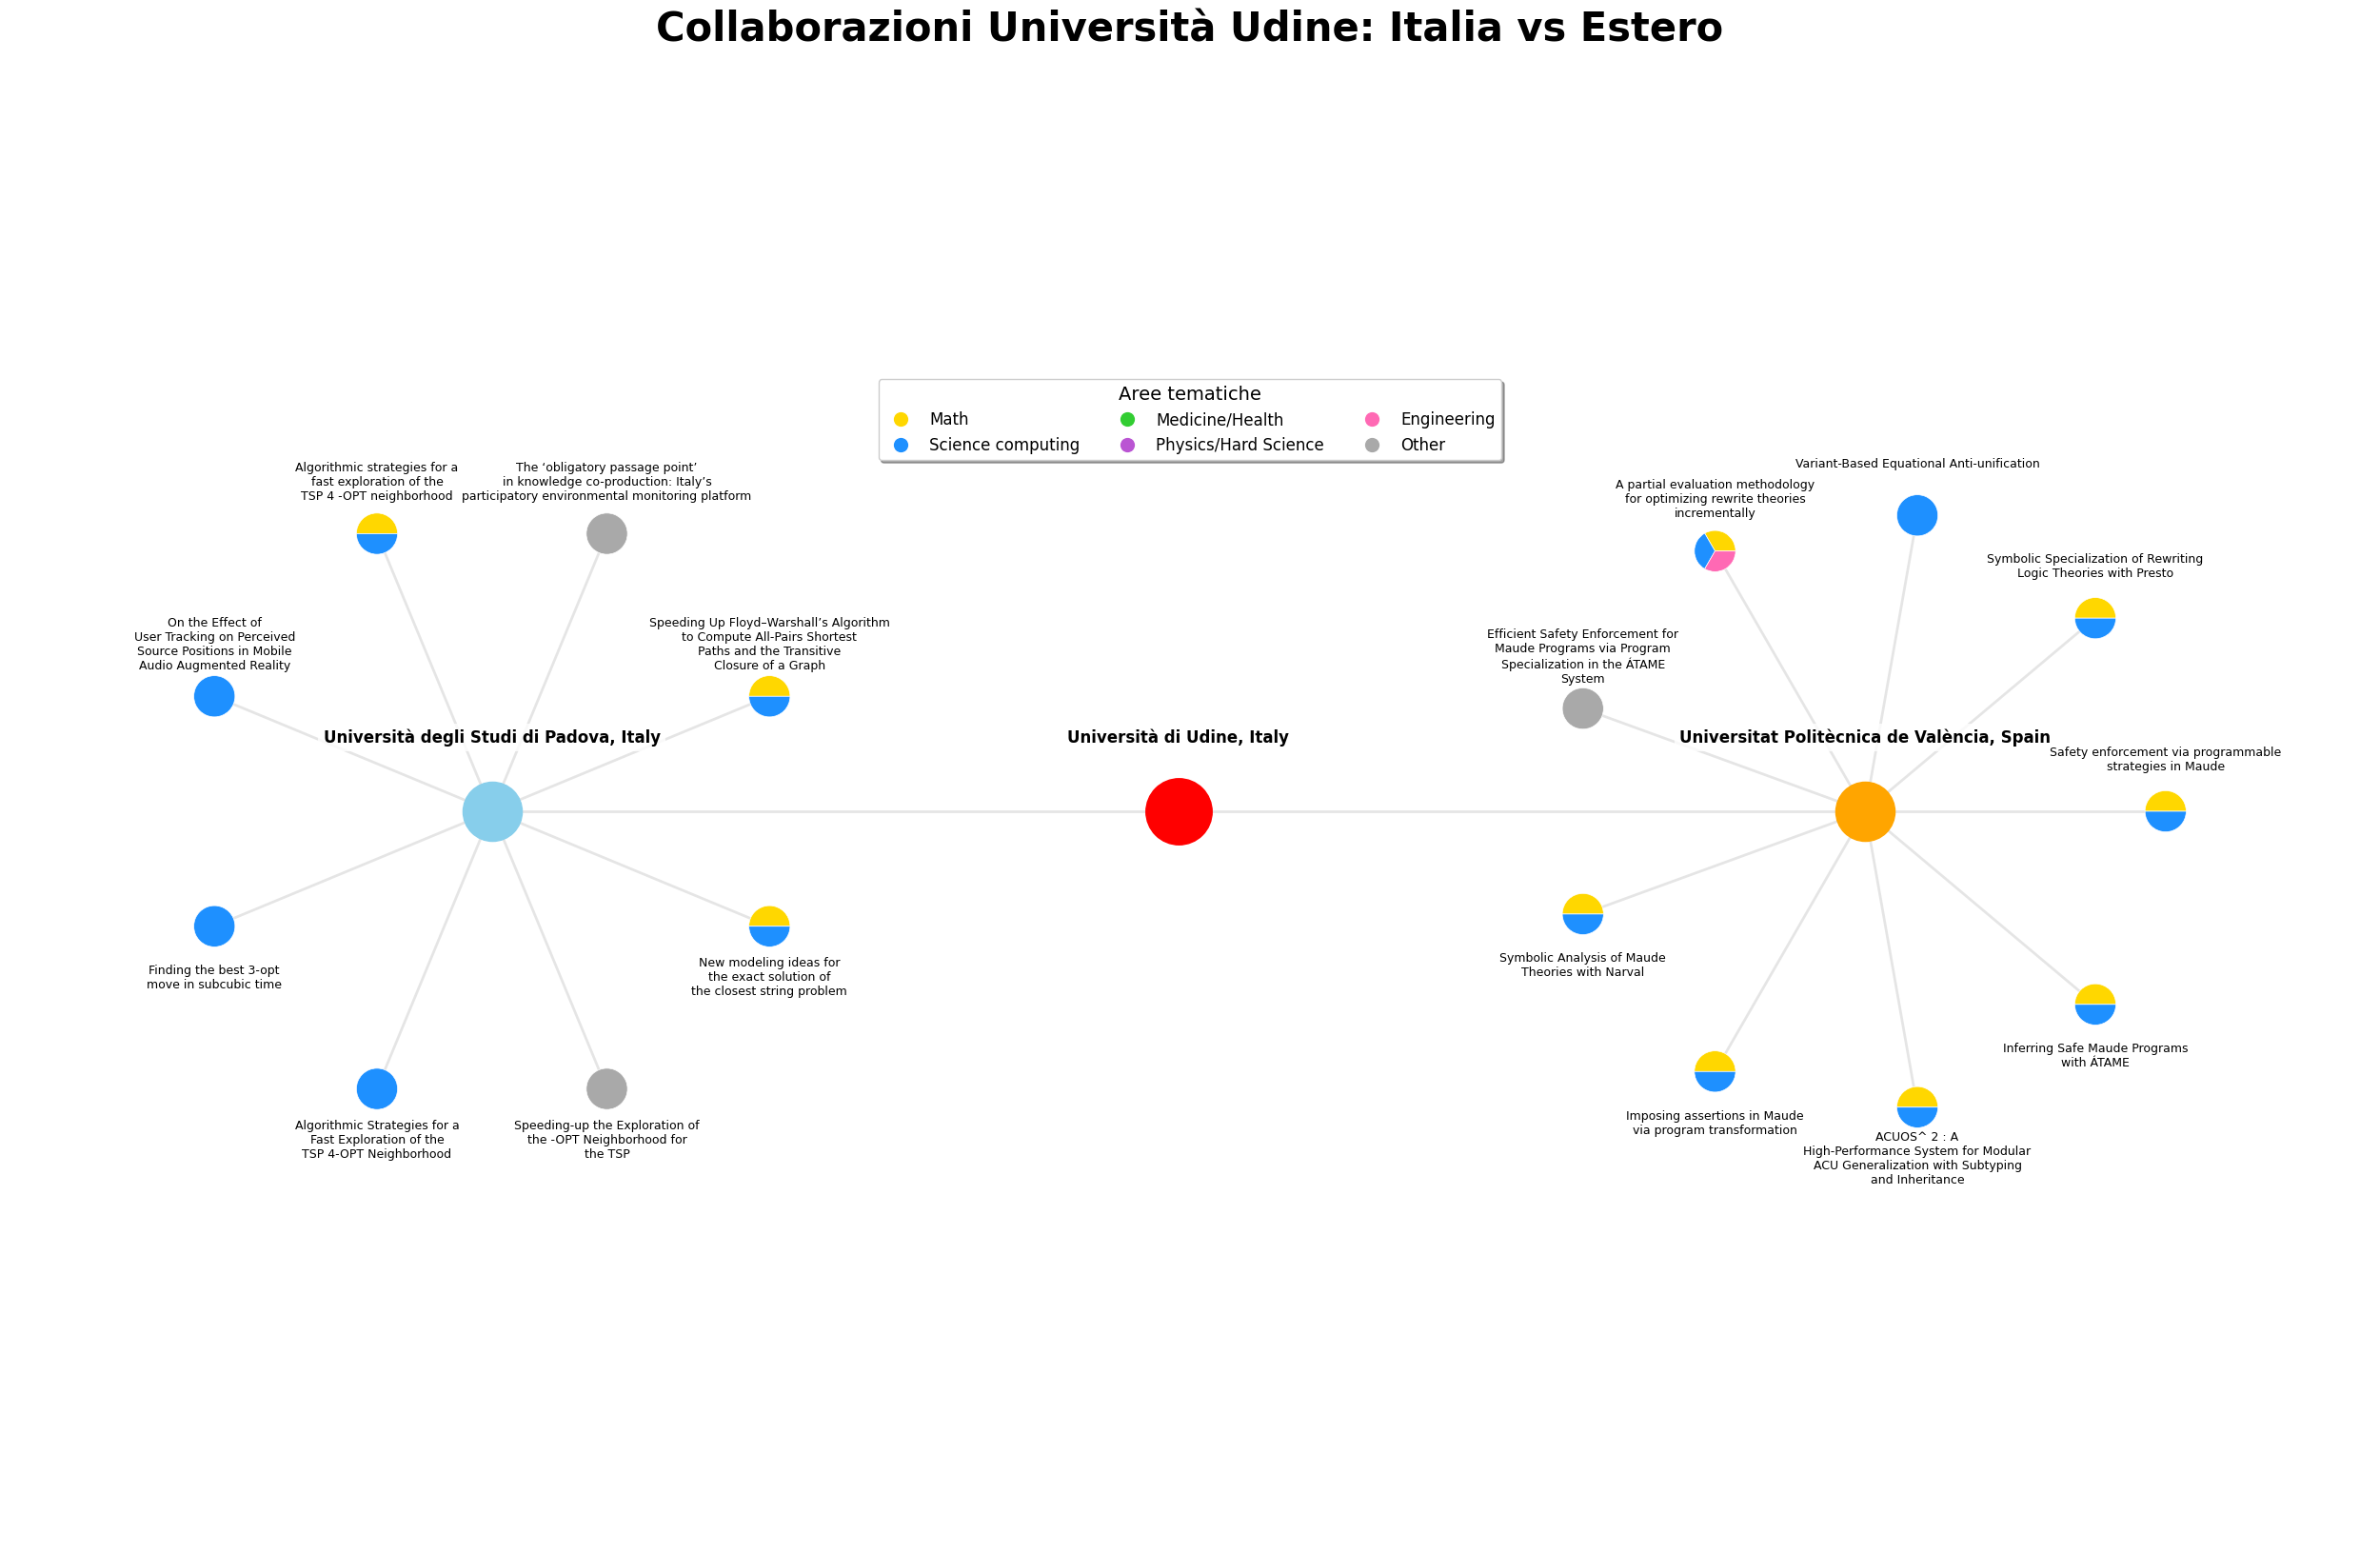

In [13]:
df_udine = df[df["Affiliations"].str.contains("Udine", case=False, na=False)].copy()
italy_counter = Counter()
foreign_counter = Counter()

def clean_uni_name(aff_string):
    parts = [p.strip() for p in aff_string.split(",")]
    if len(parts) >= 2:
        return f"{parts[0]}, {parts[-1]}"
    return aff_string

for aff_string in df_udine["Affiliations"]:
    affiliations = [a.strip() for a in aff_string.split(";")]
    for aff in affiliations:
        if "udine" in aff.lower(): continue
        if "italy" in aff.lower():
            italy_counter[aff] += 1
        else:
            foreign_counter[aff] += 1

raw_italy = italy_counter.most_common(1)[0][0]
raw_foreign = foreign_counter.most_common(1)[0][0]

uni_italy_clean = clean_uni_name(raw_italy)
uni_foreign_clean = clean_uni_name(raw_foreign)
udine_clean = "Università di Udine, Italy"

#configurazione categorie
categories_map = {
    "Math": ["math", "algebra", "logic", "discrete", "geometry", "analis", "matemat", "combinatorics", "graph theory", "set theory", "formal proofs", "optimization", "calculus", "numerical", "complexity"],
    "Science computing": ["computer", "algorithm", "informatic", "computing", "systems", "intelligence", "ai", "software", "data", "cyber", "heuristics", "ceur", "acm", "ieee", "machine learning", "deep learning", "neural net", "signal processing", "vision", "image", "cloud", "iot", "programming", "simulation"],
    "Medicine/Health": ["medicine", "neuro", "clinical", "drug", "health", "pharmac", "genet", "cancer", "bio", "oncology", "epilepsy", "sleep", "seizure", "cerebellum", "sclerosis", "thrombosis", "brain", "patient", "therapy", "medical"],
    "Physics/Hard Science": ["physic", "nuclear", "chemical", "chemistry", "nanoscale", "molecule", "material", "energy", "atoms", "mechanics", "astronomy", "scientific"],
    "Engineering": ["engineering", "mechanical", "electrical", "transportation", "manufacturing", "robotics", "control", "automation", "electronics", "sensors"]
}

color_palette = {
    "Math": "#FFD700", "Science computing": "#1E90FF", "Medicine/Health": "#32CD32",
    "Physics/Hard Science": "#BA55D3", "Engineering": "#FF69B4", "Other": "#A9A9A9"
}

# Set per tenere traccia delle categorie effettivamente usate
def get_article_categories(row):
    full_text = " ".join([str(row.get("Title", "")), str(row.get("Author Keywords", "")), str(row.get("Index Keywords", ""))]).lower()
    found = [cat for cat, keywords in categories_map.items() if any(kw in full_text for kw in keywords)]
    final_cats = found if found else ["Other"]
    return final_cats

def sanitize_title(title):
    if not isinstance(title, str): return ""
    for ch in ["$", "{", "}", "\\"]: title = title.replace(ch, "")
    title = title.replace("textsf", "").replace("mathbf", "")
    words = title.split()
    if len(words) > 4:
        lines = [" ".join(words[i:i+4]) for i in range(0, len(words), 4)]
        title = "\n".join(lines)
    return title.strip()

#grafo
G = nx.Graph()
G.add_edge(udine_clean, uni_italy_clean)
G.add_edge(udine_clean, uni_foreign_clean)

left, right, center = [], [], []
article_data = {}

for _, row in df_udine.iterrows():
    aff_lower = str(row["Affiliations"]).lower()
    title = sanitize_title(row["Title"])
    article_data[title] = get_article_categories(row)
    
    has_it = raw_italy.lower() in aff_lower
    has_fr = raw_foreign.lower() in aff_lower

    if has_it and not has_fr:
        left.append(title); G.add_edge(uni_italy_clean, title)
    elif has_fr and not has_it:
        right.append(title); G.add_edge(uni_foreign_clean, title)
    elif has_it and has_fr:
        center.append(title); G.add_edge(uni_italy_clean, title); G.add_edge(uni_foreign_clean, title)

#layout
pos = {udine_clean: (0, 0), uni_italy_clean: (-8, 0), uni_foreign_clean: (8, 0)}

def arrange_full_circle(center_pos, items, radius):
    if not items: return  
    start_offset = np.radians(22.5) if len(items) % 2 == 0 else 0 # Slittamento di 22.5 gradi per i numeri pari
    angles = np.linspace(0, 2*np.pi, len(items), endpoint=False) + start_offset
    for i, t in enumerate(items):
        pos[t] = (center_pos[0] + radius * np.cos(angles[i]), 
                  center_pos[1] + radius * np.sin(angles[i]))

#risoluzione testo stretto
arrange_full_circle(pos[uni_italy_clean], left, 3.5)
arrange_full_circle(pos[uni_foreign_clean], right, 3.5)
arrange_full_circle((0, -4.5), center, 2.5)

#creazione grafo
plt.figure(figsize=(32, 20))
plt.title("Collaborazioni Università Udine: Italia vs Estero", fontsize=30, fontweight='bold',y=1.02)
ax = plt.gca()
ax.set_aspect('equal', adjustable='datalim')

nx.draw_networkx_edges(G, pos, alpha=0.1, edge_color="black", width=2)
nx.draw_networkx_nodes(G, pos, [udine_clean], node_color='red', node_size=2500)
nx.draw_networkx_nodes(G, pos, [uni_italy_clean], node_color='skyblue', node_size=2000)
nx.draw_networkx_nodes(G, pos, [uni_foreign_clean], node_color='orange', node_size=2000)

def draw_pie_node(center, categories, radius=0.25):
    n = len(categories)
    angle_per_slice = 360 / n
    for i, cat in enumerate(categories):
        w = Wedge(center, radius, i*angle_per_slice, (i+1)*angle_per_slice, 
                  facecolor=color_palette.get(cat, "#A9A9A9"), edgecolor='white', linewidth=0.5, zorder=3)
        ax.add_patch(w)

all_articles = left + right + center
for node in all_articles:
    draw_pie_node(pos[node], article_data[node], radius=0.24)

#etichette università
for n in [udine_clean, uni_italy_clean, uni_foreign_clean]:
    x, y = pos[n]
    plt.text(x, y + 0.8, s=n, fontsize=12, fontweight='bold', ha='center', 
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

#etichette articoli
for art in all_articles:
    x, y = pos[art]
    if art in left: cp = pos[uni_italy_clean]
    elif art in right: cp = pos[uni_foreign_clean]
    else: cp = (0, -4.5)
    
    # Offset maggiore per evitare che il testo largo tocchi il nodo
    offset_y = 0.60 if y >= cp[1] else -0.60
    plt.text(x, y + offset_y, s=art, fontsize=9, ha="center", va="center",
             bbox=dict(facecolor='white', alpha=0.85, edgecolor='none', pad=0.3))

#legenda
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=k, 
           markerfacecolor=v, markersize=12) 
    for k, v in color_palette.items()
]

plt.legend(handles=legend_elements, 
           loc='upper center', 
           bbox_to_anchor=(0.5, 0.80), 
           title="Aree tematiche", 
           fontsize=12, 
           title_fontsize=14,
           ncol=3,                    
           frameon=True, 
           shadow=True)

plt.axis("off")
plt.show()

In [14]:

#TODO: DA ELIMINARE
def salva_grafo_json(G, pos, article_data, filename="grafo4.json", output_dir="."):
    os.makedirs(output_dir, exist_ok=True)

    data = json_graph.node_link_data(G)
    
    # Aggiungiamo informazioni extra
    data['positions'] = {str(n): (float(x), float(y)) for n, (x, y) in pos.items()}
    data['categories'] = {str(n): cats for n, cats in article_data.items()}

    filepath = os.path.join(output_dir, filename)
    with open(filepath, "w", encoding="utf-8") as f:
        json.dump(data, f, ensure_ascii=False, indent=2)
    
    print(f"Grafo salvato in JSON: {filepath}")
#salva_grafo_json(G, pos, article_data, filename="grafo4.json", output_dir="social/graphs")
salva_grafo_json(G, pos, article_data, filename="grafo 4.json", output_dir=r"C:\Users\alice\social\graphs")


Grafo salvato in JSON: C:\Users\alice\social\graphs\grafo 4.json


### 7) Quinto grafo: network di collaborazioni dell’autore centrale
Analisi delle collaborazioni universitarie dell’autore più centrale, distinguendo tra collaborazioni interne a Udine, nazionali e internazionali.


In [15]:
df = df.dropna(subset=["Author full names"])
df["authors_list"] = (
    df["Author full names"]
    .str.split(";")
    .apply(lambda authors: [
        re.sub(r"\s*\([^)]*\)", "", a).replace(",", "").strip()
        for a in authors
    ])
)
#autore con più collaborazioni
def get_central_author_data(df):
    G_temp = nx.Graph()
    for authors in df["authors_list"]:
        if len(authors) > 1:
            for i in range(len(authors)):
                for j in range(i + 1, len(authors)):
                    G_temp.add_edge(authors[i], authors[j])
    
    degree_cent = nx.degree_centrality(G_temp)
    # Prende il primo della lista per Degree
    top_author = sorted(degree_cent.items(), key=lambda x: x[1], reverse=True)[0][0]
    return top_author

# Otteniamo l'autore centrale
central_author = get_central_author_data(df)

#creazione grafo collaborazioni 
G = nx.Graph()
G.add_node(central_author, type='central', weight=0)

university_counts = Counter()

# Filtriamo per gli articoli dell'autore centrale
df_central_author = df[df["authors_list"].apply(lambda x: central_author in x)].copy()

for _, row in df_central_author.iterrows():
    # Verifica collaborazione interna Udine
    authors_with_affs = str(row.get("Authors with affiliations", ""))
    udine_occurrences = len(re.findall(r"Udine", authors_with_affs, re.IGNORECASE))
    internal_collab_udine = udine_occurrences > 1

    # Estrazione università
    affiliations = row.get("Affiliations", "")
    if pd.isna(affiliations): continue
    
    parts = re.split(r";|\|", str(affiliations))
    universities = [p.strip() for p in parts if any(k in p.lower() for k in ["univ", "universit", "university"])]
    
    unique_unis_in_paper = set()
    for u in universities:
        if "udine" in u.lower():
            if internal_collab_udine: unique_unis_in_paper.add(u)
        else:
            unique_unis_in_paper.add(u)
    
    university_counts.update(unique_unis_in_paper)

# Aggiunta nodi e archi al Grafo
for uni, count in university_counts.items():
    is_udine = "udine" in uni.lower()
    is_italy = any(k in uni.lower() for k in ["italy", "italia"])
    
    u_type = "internal" if is_udine else ("italian" if is_italy else "foreign")
    G.add_node(uni, type=u_type, weight=count)
    G.add_edge(central_author, uni, weight=count)


#layout
pos = nx.spring_layout(G, k=0.4, weight='weight', seed=42) 
for node in pos:
    pos[node][1] = pos[node][1] * 0.5 

#archi
edge_x, edge_y = [], []
for edge in G.edges():
    x0, y0 = pos[edge[0]]; x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None]); edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y, line=dict(width=1, color='#D3D3D3'),
    hoverinfo='none', mode='lines', showlegend=False
)

#nodi Università
node_x, node_y, node_text, node_color, node_size = [], [], [], [], []
for node in G.nodes():
    if node == central_author: continue
    x, y = pos[node]
    node_x.append(x); node_y.append(y)
    
    data = G.nodes[node]
    color = '#FF1493' if data['type'] == 'internal' else ('skyblue' if data['type'] == 'italian' else 'orange')
    node_color.append(color)
    node_size.append(12 + data['weight'] * 4)
    node_text.append(f"{node}<br>Collaborazioni: {data['weight']}")

node_trace = go.Scatter(
    x=node_x, y=node_y, mode='markers', hoverinfo='text', text=node_text,
    marker=dict(color=node_color, size=node_size, line=dict(width=1.5, color='white')),
    showlegend=False
)

#nodo autore centrale
central_node_trace = go.Scatter(
    x=[pos[central_author][0]], y=[pos[central_author][1]],
    mode='markers+text', text=[central_author],
    textposition="top center", hoverinfo='none',
    marker=dict(color='red', size=20, line=dict(width=2, color='white')),
    textfont=dict(size=12, color='black', family="Arial Black"),
    name='Autore Centrale', showlegend=True
)

#legenda
legend_traces = [
    go.Scatter(x=[None], y=[None], mode='markers', marker=dict(size=10, color='#FF1493'), name='Udine'),
    go.Scatter(x=[None], y=[None], mode='markers', marker=dict(size=10, color='skyblue'), name='Italiana'),
    go.Scatter(x=[None], y=[None], mode='markers', marker=dict(size=10, color='orange'), name='Estera')
]

#figura finale
fig = go.Figure(data=[edge_trace, node_trace, central_node_trace] + legend_traces)
fig.update_layout(
    title=dict(text=f"Network Collaborazioni: {central_author}", x=0.5),
    legend=dict(yanchor="top", y=0.99, xanchor="right", x=0.99, bordercolor="Gray", borderwidth=1),
    margin=dict(b=20, l=40, r=40, t=60),
    width=1200, height=600,
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    paper_bgcolor='white', plot_bgcolor='white'
)

fig.show()

In [16]:

#TODO: DA ELIMINARE
def salva_grafo_central_author_json(G, pos, filename="grafo5.json", output_dir="social/graphs"):
    
    os.makedirs(output_dir, exist_ok=True)

    # Base JSON standard NetworkX
    data = json_graph.node_link_data(G)

    # Aggiungiamo le posizioni dei nodi
    data['positions'] = {str(n): (float(x), float(y)) for n, (x, y) in pos.items()}

    # Aggiungiamo attributi dei nodi (tipo, peso...)
    data['attributes'] = {str(n): dict(G.nodes[n]) for n in G.nodes()}

    # Salvataggio
    filepath = os.path.join(output_dir, filename)
    with open(filepath, "w", encoding="utf-8") as f:
        json.dump(data, f, ensure_ascii=False, indent=2)

    print(f"Grafo salvato in JSON: {filepath}")

# Esegui il salvataggio
salva_grafo_central_author_json(G, pos, filename="grafo 5.json", output_dir=r"C:\Users\alice\social\graphs")


Grafo salvato in JSON: C:\Users\alice\social\graphs\grafo 5.json


### 8) Sesto grafo: distribuzione tematica delle pubblicazioni dell’autore centrale
Visualizzazione delle pubblicazioni dell’autore principale organizzate in sei nuclei tematici e collegate alle sedi di collaborazione.

In [17]:
def clean_author_names(val):
    if not isinstance(val, str): return []
    return [re.sub(r"\s*\([^)]*\)", "", a).replace(",", "").strip() for a in val.split(";")]

#siglatura città e stato
def get_all_locations(aff_string):
    if not isinstance(aff_string, str) or aff_string == 'N/A':
        return "N/A"
    
    individual_affs = aff_string.split(';')
    locations = set()
    
    for aff in individual_affs:
        parts = [p.strip() for p in aff.split(',')]
        if len(parts) >= 3:
            # Se il penultimo elemento è una sigla (es. UD, NY, RM) di 2 lettere
            if len(parts[-2]) <= 2:
                # Prende la terzultima (Città) e l'ultima (Stato)
                loc = f"{parts[-3]}, {parts[-1]}"
            else:
                # Altrimenti logica standard: penultima e ultima
                loc = f"{parts[-2]}, {parts[-1]}"
            
            # Pulizia numeri/CAP
            loc = re.sub(r'\d{3,}', '', loc).strip() 
            locations.add(loc)
        elif len(parts) == 2:
            locations.add(f"{parts[0]}, {parts[1]}")
    
    return " | ".join(sorted(locations)) if locations else "N/A"

df["authors_list"] = df["Author full names"].apply(clean_author_names)

#suddivisione nei 6 nuclei
def get_category_6(source_title):
    s = str(source_title).lower()
    if any(k in s for k in ["epilepsia", "seizure", "epilepsy"]): return "Epilessia"
    if any(k in s for k in ["pharmacotherapy", "therapeutics", "drug", "toxicology"]): return "Farmacologia e Terapie"
    if any(k in s for k in ["sleep", "nature and science"]): return "Medicina del Sonno"
    if any(k in s for k in ["multiple sclerosis", "neuroimmunology", "neurovirology", "aging", "neurobiology of aging"]): return "Sottospecialità Neurologiche"
    if any(k in s for k in ["clinical medicine", "acta biomedica", "thrombosis"]): return "Medicina Generale e Clinica"
    return "Neurologia e Neuroscienze Cliniche"

#filtro Autore
target_author = "Gigli Gian Luigi"
mask = df["authors_list"].apply(lambda x: target_author in x)
articoli = df[mask].copy()

#Configurazione GEOMETRICA
cat_names_secondary = ["Epilessia", "Medicina del Sonno", "Farmacologia e Terapie", "Sottospecialità Neurologiche", "Medicina Generale e Clinica"]
main_cat = "Neurologia e Neuroscienze Cliniche"

cat_colors = {
    "Neurologia e Neuroscienze Cliniche": "#1f77b4", 
    "Epilessia": "#2ca02c", 
    "Medicina del Sonno": "#9467bd", 
    "Farmacologia e Terapie": "#ff7f0e", 
    "Sottospecialità Neurologiche": "#e377c2", 
    "Medicina Generale e Clinica": "#17becf"
}

cat_coords = {}
cat_coords[main_cat] = (6.5, 0) # Neurologia a EST

angles = np.linspace(60 * (np.pi/180), 280 * (np.pi/180), len(cat_names_secondary))
for name, angle in zip(cat_names_secondary, angles):
    cat_coords[name] = (5.5 * np.cos(angle), 5.5 * np.sin(angle))

fig = go.Figure()

#archi principali
for name, (cx, cy) in cat_coords.items():
    fig.add_trace(go.Scatter(
        x=[0, cx, None], y=[0, cy, None],
        mode='lines',
        line=dict(color='black', width=1),
        hoverinfo='none', showlegend=False
    ))

# --- 2. ARCHI E NODI ARTICOLI ---
for cat in [main_cat] + cat_names_secondary:
    articoli_cat = articoli[articoli['Source title'].apply(get_category_6) == cat]
    cx, cy = cat_coords[cat]
    n_art = len(articoli_cat)
    
    art_x, art_y, art_hover_text, art_source_full, art_positions = [], [], [], [], []
    r_orbita = 3.5 if cat == main_cat else 2
    
    offset_rotazione = (np.pi / 4) if n_art == 6 else 0
    
    for i, (idx, row) in enumerate(articoli_cat.iterrows()):
        angle = ((2 * np.pi * i) / n_art) + offset_rotazione if n_art > 0 else 0
        ax, ay = cx + r_orbita * np.cos(angle), cy + r_orbita * np.sin(angle)
        
        fig.add_trace(go.Scatter(
            x=[cx, ax, None], y=[cy, ay, None],
            mode='lines',
            line=dict(color=cat_colors[cat], width=0.8),
            opacity=0.5, hoverinfo='none', showlegend=False, legendgroup=cat
        ))
        
        art_x.append(ax)
        art_y.append(ay)
        
        # Recupero di tutte le città 
        raw_aff = str(row.get('Affiliations', 'N/A'))
        all_cities = get_all_locations(raw_aff)

        art_hover_text.append(
            f"<b>TITOLO:</b> {row['Title']}<br>"
            f"<b>ANNO:</b> {row['Year']}<br>"
            f"<b>COLLABORAZIONI:</b> {all_cities}"
        )
        
        art_source_full.append(str(row['Source title']))
        
        if ay >= cy:
            art_positions.append("top center")
        else:
            art_positions.append("bottom center")

    fig.add_trace(go.Scatter(
        x=[cx], y=[cy], mode='markers',
        name=cat, legendgroup=cat,
        marker=dict(color=cat_colors[cat], size=35, line=dict(width=2, color='white')),
        hoverinfo='none'
    ))

    fig.add_trace(go.Scatter(
        x=art_x, y=art_y, 
        mode='markers+text', 
        text=art_source_full, 
        textposition=art_positions,
        legendgroup=cat, showlegend=False, 
        marker=dict(color=cat_colors[cat], size=8, line=dict(width=1, color='white')),
        textfont=dict(size=7.5, color="#333"),
        hovertext=art_hover_text, 
        hoverinfo='text'
    ))

#nodo autore centrale
fig.add_trace(go.Scatter(
    x=[0], y=[0], mode='markers+text',
    text=[f"<b>{target_author}</b>"], 
    textposition="bottom center",
    marker=dict(size=30, color='red'),
    textfont=dict(size=10, color="black"), 
    hoverinfo='none', showlegend=False
))

#layout
fig.update_layout(
    width=1600, height=1400,
    margin=dict(l=50, r=50, t=120, b=50),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False, range=[-11, 11]),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False, range=[-8, 8]),
    paper_bgcolor='white', plot_bgcolor='white',
    legend=dict(title="Nuclei tematici", yanchor="middle", y=0.5, xanchor="left", x=1.02),
    title=dict(
        text="Articoli di Gigli Gian Luigi per nucleo tematico",
        x=0.5,       # centrato orizzontalmente
        y=0.95,
        xanchor='center',
        yanchor='top',
        font=dict(size=22, family="Arial", color="black", weight="bold")
    )
)

fig.show()

In [18]:
#TODO: DA ELIMINARE

def salva_grafo_nuclei_plotly_json(articoli, target_author, cat_coords, get_category_6, get_all_locations, filename="grafo7.json", output_dir="."):

    os.makedirs(output_dir, exist_ok=True)

    nodes = {}
    edges = []

    # Nodo autore centrale
    nodes[target_author] = {"type": "central", "x": 0, "y": 0}

    # Ciclo sui nuclei e articoli
    for cat, (cx, cy) in cat_coords.items():
        articoli_cat = articoli[articoli['Source title'].apply(get_category_6) == cat]
        n_art = len(articoli_cat)
        r_orbita = 3.5 if cat == "Neurologia e Neuroscienze Cliniche" else 2
        offset_rotazione = (np.pi / 4) if n_art == 6 else 0

        # Nodo nucleo
        nodes[cat] = {"type": "nucleus", "x": float(cx), "y": float(cy)}

        for i, (_, row) in enumerate(articoli_cat.iterrows()):
            angle = ((2 * np.pi * i) / n_art) + offset_rotazione if n_art > 0 else 0
            ax, ay = cx + r_orbita * np.cos(angle), cy + r_orbita * np.sin(angle)
            title = row['Source title']
            locs = get_all_locations(row.get('Affiliations', 'N/A'))

            nodes[title] = {
                "type": "article",
                "x": float(ax),
                "y": float(ay),
                "category": cat,
                "title": row['Title'],
                "year": row['Year'],
                "locations": locs
            }

            # Arco dall'autore centrale all'articolo
            edges.append({"source": target_author, "target": title})

    # Salvataggio JSON
    data = {"nodes": nodes, "edges": edges}
    filepath = os.path.join(output_dir, filename)
    with open(filepath, "w", encoding="utf-8") as f:
        json.dump(data, f, ensure_ascii=False, indent=2)

    print(f"Grafo nuclei Plotly salvato in JSON: {filepath}")
salva_grafo_nuclei_plotly_json(
    articoli=articoli,
    target_author=target_author,
    cat_coords=cat_coords,
    get_category_6=get_category_6,
    get_all_locations=get_all_locations,
    filename="grafo 6.json",
    output_dir=r"C:\Users\alice\social\graphs"
)


Grafo nuclei Plotly salvato in JSON: C:\Users\alice\social\graphs\grafo 6.json
